# Face and Eye Detection with Haar Cascade Classifiers

* Use Haarcascade Classifiers to detect faces
* Use Haarcascade Classifiers to detect eyes
* Use Haarcascade Classifiers to detect via webcam

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

--2022-08-31 14:53:15--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.194
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  6.97MB/s    in 4.0s    

2022-08-31 14:53:20 (6.97 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2022-08-31 14:53:20--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.42
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.42|:443... connected.
HTTP

# HAAR Cascade Classifiers

* First Detection Algorithm
* Fast 
* Sliding Windows across image and does convolution operation to extract features

**Feature List**
* Edge Features
* Line Features
* Four Rectangle Features

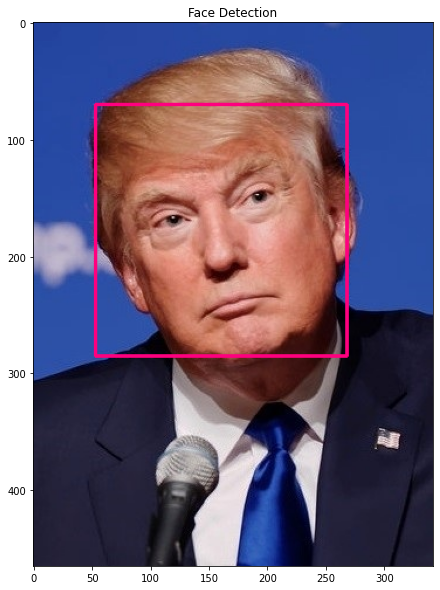

In [ ]:
#point opencv's CasscadeClassifier function to where our classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

#Load Images and then convert it
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Classifier returns ROI of the detected face as a Tuple
#It stores top-left and bottom-right cordinate
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

#When No face detected
if faces is ():
  print("No faces found")

#Iterate through through each face and  draw a rectangle over each face
for (x,y,w,h) in faces:
  cv2.rectangle(image, (x,y), (x+w, y+w), (127, 0, 255), 2)

imshow('Face Detection', image)

#### Simple Eye and Face detection using Haarcascade classifier

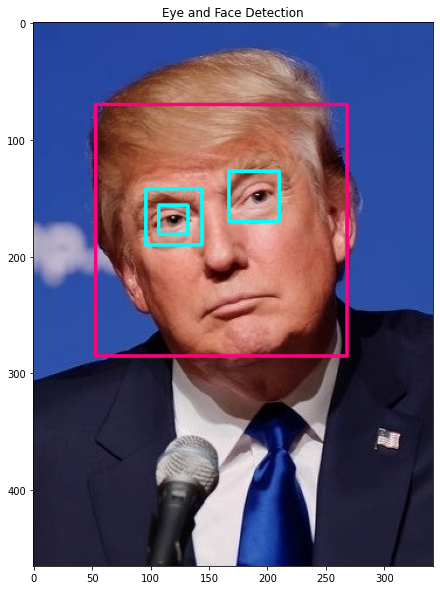

In [ ]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

#When no face detected, face_classifier returns empty value
if faces is ():
  print("No face found")

for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w,y+h), (127,0,255),2)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (255, 255, 0), 2)

imshow('Eye and Face Detection', img)

# Vehicle and Pedestrian Detection

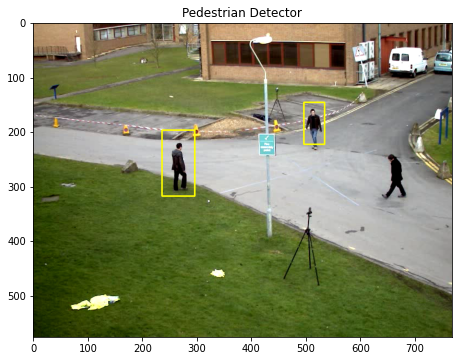

In [ ]:
# Create our video capturing object
cap = cv2.VideoCapture('./images/walking.avi')

# Load our body classifier
body_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Pedestrian Detector", frame)

In [ ]:
# Create our video capturing object
cap = cv2.VideoCapture('./images/walking.avi')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()